# Analysis of the distribution of pathogenisity categories in consequence types 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Import unfiltered Ensembl exon variant table that contains only variants from dbSNP

In [2]:
#Unfiltered Ensembl variants
#This file has been prodices dy the '1_Reference_Ensembl_table' notebook
ens = pd.read_csv(
    'MD_genes_exon_variants_Ens_unfiltered_dbSNP.csv',
    converters={i: str for i in range(15)})
ens

,feature_type,consequence_type,clinical_significance,start,end,seq_region_name,assembly_name,alleles,strand,id,source,Gene,Transcript,Exon
0,variation,5_prime_UTR_variant,[],57227726.0,57227726.0,3,GRCh38,"['C', 'G', 'T']",1.0,rs1007095765,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003837686
1,variation,5_prime_UTR_variant,[],57227729.0,57227729.0,3,GRCh38,"['G', 'A', 'T']",1.0,rs908576182,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003837686
2,variation,5_prime_UTR_variant,[],57227731.0,57227731.0,3,GRCh38,"['A', 'C', 'G']",1.0,rs578118925,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003837686
3,variation,5_prime_UTR_variant,[],57227732.0,57227732.0,3,GRCh38,"['C', 'A', 'T']",1.0,rs965683268,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003837686
4,variation,5_prime_UTR_variant,['likely benign'],57227733.0,57227733.0,3,GRCh38,"['G', 'C', 'T']",1.0,rs113307246,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003837686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540235,variation,missense_variant,[],100781336.0,100781336.0,10,GRCh38,"['C', 'T']",1.0,rs1234454137,dbSNP,ENSG00000075891,ENST00000554172,ENSE00002435858
540236,variation,missense_variant,[],100781339.0,100781339.0,10,GRCh38,"['A', 'G']",1.0,rs1257925666,dbSNP,ENSG00000075891,ENST00000554172,ENSE00002435858
540237,variation,missense_variant,[],100781340.0,100781340.0,10,GRCh38,"['T', 'A', 'C']",1.0,rs758231319,dbSNP,ENSG00000075891,ENST00000554172,ENSE00002435858
540238,variation,missense_variant,[],100824650.0,100824650.0,10,GRCh38,"['C', 'T']",1.0,rs761402395,dbSNP,ENSG00000075891,ENST00000554172,ENSE00003739908


In [3]:
#Leave only variants with known clinical significance
clin_sign = ens[ens['clinical_significance'] != '[]'].reset_index(drop=True)
clin_sign

,feature_type,consequence_type,clinical_significance,start,end,seq_region_name,assembly_name,alleles,strand,id,source,Gene,Transcript,Exon
0,variation,5_prime_UTR_variant,['likely benign'],57227733.0,57227733.0,3,GRCh38,"['G', 'C', 'T']",1.0,rs113307246,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003837686
1,variation,5_prime_UTR_variant,['benign'],57227866.0,57227866.0,3,GRCh38,"['C', 'T']",1.0,rs7643644,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003837686
2,variation,synonymous_variant,['benign'],57227892.0,57227892.0,3,GRCh38,"['G', 'A']",1.0,rs571175742,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003837686
3,variation,synonymous_variant,['benign'],57227919.0,57227919.0,3,GRCh38,"['G', 'C']",1.0,rs79282761,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003837686
4,variation,synonymous_variant,['benign'],57235580.0,57235580.0,3,GRCh38,"['A', 'G']",1.0,rs11544592,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003577757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100762,variation,frameshift_variant,['pathogenic'],100781310.0,100781310.0,10,GRCh38,"['C', '-']",1.0,rs77777862,dbSNP,ENSG00000075891,ENST00000554172,ENSE00002435858
100763,variation,missense_variant,['uncertain significance'],100781312.0,100781312.0,10,GRCh38,"['A', 'G']",1.0,rs767995614,dbSNP,ENSG00000075891,ENST00000554172,ENSE00002435858
100764,variation,missense_variant,['pathogenic'],100781314.0,100781314.0,10,GRCh38,"['G', 'A']",1.0,rs1131692055,dbSNP,ENSG00000075891,ENST00000554172,ENSE00002435858
100765,variation,missense_variant,['uncertain significance'],100781323.0,100781323.0,10,GRCh38,"['G', 'C']",1.0,rs1589848170,dbSNP,ENSG00000075891,ENST00000554172,ENSE00002435858


## 2. Work with clinical significance types

In [4]:
#Checking the consequences types
clin_sign['consequence_type'].unique()

array(['5_prime_UTR_variant', 'synonymous_variant', 'missense_variant',
       'stop_gained', 'non_coding_transcript_exon_variant',
       'splice_donor_region_variant', 'splice_region_variant',
       'frameshift_variant', 'start_lost', 'stop_lost',
       'inframe_insertion', '3_prime_UTR_variant',
       'splice_polypyrimidine_tract_variant', 'inframe_deletion',
       'splice_acceptor_variant', 'splice_donor_variant',
       'stop_retained_variant', 'splice_donor_5th_base_variant',
       'protein_altering_variant', 'intron_variant',
       'coding_sequence_variant'], dtype=object)

In [5]:
#replacing the column with the column containing lists and not strings
new_clin_sig = []
for sig in clin_sign['clinical_significance']:
    new_clin_sig.append(sig.replace("'", "").replace("[", "").replace("]", "").split(', '))
clin_sign['clinical_significance'] = new_clin_sig
clin_sign 

,feature_type,consequence_type,clinical_significance,start,end,seq_region_name,assembly_name,alleles,strand,id,source,Gene,Transcript,Exon
0,variation,5_prime_UTR_variant,[likely benign],57227733.0,57227733.0,3,GRCh38,"['G', 'C', 'T']",1.0,rs113307246,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003837686
1,variation,5_prime_UTR_variant,[benign],57227866.0,57227866.0,3,GRCh38,"['C', 'T']",1.0,rs7643644,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003837686
2,variation,synonymous_variant,[benign],57227892.0,57227892.0,3,GRCh38,"['G', 'A']",1.0,rs571175742,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003837686
3,variation,synonymous_variant,[benign],57227919.0,57227919.0,3,GRCh38,"['G', 'C']",1.0,rs79282761,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003837686
4,variation,synonymous_variant,[benign],57235580.0,57235580.0,3,GRCh38,"['A', 'G']",1.0,rs11544592,dbSNP,ENSG00000157500,ENST00000650354,ENSE00003577757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100762,variation,frameshift_variant,[pathogenic],100781310.0,100781310.0,10,GRCh38,"['C', '-']",1.0,rs77777862,dbSNP,ENSG00000075891,ENST00000554172,ENSE00002435858
100763,variation,missense_variant,[uncertain significance],100781312.0,100781312.0,10,GRCh38,"['A', 'G']",1.0,rs767995614,dbSNP,ENSG00000075891,ENST00000554172,ENSE00002435858
100764,variation,missense_variant,[pathogenic],100781314.0,100781314.0,10,GRCh38,"['G', 'A']",1.0,rs1131692055,dbSNP,ENSG00000075891,ENST00000554172,ENSE00002435858
100765,variation,missense_variant,[uncertain significance],100781323.0,100781323.0,10,GRCh38,"['G', 'C']",1.0,rs1589848170,dbSNP,ENSG00000075891,ENST00000554172,ENSE00002435858


## 3. Work with pathogenicity categories

In [6]:
clin_sig_types = []
for sig in clin_sign['clinical_significance']:
    for el in sig:
        if el not in clin_sig_types:
            clin_sig_types.append(el)

In [7]:
clin_sig_types

['likely benign',
 'benign',
 'uncertain significance',
 'pathogenic',
 'association',
 'risk factor',
 'likely pathogenic',
 'other',
 'not provided',
 'affects',
 'protective',
 'drug response']

In [8]:
consequence_types = clin_sign['consequence_type'].unique()

In [9]:
#creating and checking components for the matrix
sig_dfs = []
for sig_type in clin_sig_types:
    df_one_sig_type = clin_sign[clin_sign.clinical_significance.apply(
        lambda lst: all(x == sig_type for x in lst))].reset_index(drop=True)
    sig_dfs.append(df_one_sig_type)
    for cons_type in clin_sign['consequence_type'].unique():
        print(sig_type, cons_type, len(df_one_sig_type[df_one_sig_type['consequence_type'] == cons_type])) 

likely benign 5_prime_UTR_variant 229
likely benign synonymous_variant 13012
likely benign missense_variant 3504
likely benign stop_gained 294
likely benign non_coding_transcript_exon_variant 250
likely benign splice_donor_region_variant 12
likely benign splice_region_variant 441
likely benign frameshift_variant 29
likely benign start_lost 0
likely benign stop_lost 35
likely benign inframe_insertion 10
likely benign 3_prime_UTR_variant 869
likely benign splice_polypyrimidine_tract_variant 227
likely benign inframe_deletion 29
likely benign splice_acceptor_variant 18
likely benign splice_donor_variant 40
likely benign stop_retained_variant 13
likely benign splice_donor_5th_base_variant 14
likely benign protein_altering_variant 5
likely benign intron_variant 0
likely benign coding_sequence_variant 0
benign 5_prime_UTR_variant 326
benign synonymous_variant 1223
benign missense_variant 1015
benign stop_gained 36
benign non_coding_transcript_exon_variant 269
benign splice_donor_region_varia

In [10]:
#creating the matrix 

matrix_colnames = ['significance']
matrix_colnames.extend(consequence_types)
matrix_rows = []

print(matrix_colnames)

sig_dfs = []
for sig_type in clin_sig_types:
    df_one_sig_type = clin_sign[clin_sign.clinical_significance.apply(
        lambda lst: all(x == sig_type for x in lst))].reset_index(drop=True)
    sig_dfs.append(df_one_sig_type)
    matrix_row = [sig_type] + [ len(df_one_sig_type[df_one_sig_type['consequence_type'] == cons_type]) for cons_type in consequence_types ]
    matrix_rows.append(matrix_row)
    
matrix_df = pd.DataFrame(columns=matrix_colnames, data=matrix_rows)
matrix_df

['significance', '5_prime_UTR_variant', 'synonymous_variant', 'missense_variant', 'stop_gained', 'non_coding_transcript_exon_variant', 'splice_donor_region_variant', 'splice_region_variant', 'frameshift_variant', 'start_lost', 'stop_lost', 'inframe_insertion', '3_prime_UTR_variant', 'splice_polypyrimidine_tract_variant', 'inframe_deletion', 'splice_acceptor_variant', 'splice_donor_variant', 'stop_retained_variant', 'splice_donor_5th_base_variant', 'protein_altering_variant', 'intron_variant', 'coding_sequence_variant']


,significance,5_prime_UTR_variant,synonymous_variant,missense_variant,stop_gained,non_coding_transcript_exon_variant,splice_donor_region_variant,splice_region_variant,frameshift_variant,start_lost,...,3_prime_UTR_variant,splice_polypyrimidine_tract_variant,inframe_deletion,splice_acceptor_variant,splice_donor_variant,stop_retained_variant,splice_donor_5th_base_variant,protein_altering_variant,intron_variant,coding_sequence_variant
0,likely benign,229,13012,3504,294,250,12,441,29,0,...,869,227,29,18,40,13,14,5,0,0
1,benign,326,1223,1015,36,269,3,35,22,1,...,1388,17,0,1,4,3,1,0,4,0
2,uncertain significance,835,1498,30320,643,50,40,214,321,51,...,4232,56,693,40,75,5,37,113,1,6
3,pathogenic,19,42,2669,2729,1,1,14,5328,51,...,20,20,181,215,225,0,5,22,0,4
4,association,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,risk factor,0,0,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,likely pathogenic,1,59,3004,584,2,1,17,1329,15,...,3,17,161,81,135,0,5,32,0,0
7,other,0,0,381,5,0,0,0,6,0,...,0,0,53,0,4,0,0,0,0,0
8,not provided,6,16,964,44,5,0,6,163,13,...,15,0,48,4,8,5,0,1,0,0
9,affects,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Heat map

In [11]:
matrix = matrix_df.set_index('significance')
matrix

,5_prime_UTR_variant,synonymous_variant,missense_variant,stop_gained,non_coding_transcript_exon_variant,splice_donor_region_variant,splice_region_variant,frameshift_variant,start_lost,stop_lost,...,3_prime_UTR_variant,splice_polypyrimidine_tract_variant,inframe_deletion,splice_acceptor_variant,splice_donor_variant,stop_retained_variant,splice_donor_5th_base_variant,protein_altering_variant,intron_variant,coding_sequence_variant
significance,,,,,,,,,,,,,,,,,,,,,
likely benign,229,13012,3504,294,250,12,441,29,0,35,...,869,227,29,18,40,13,14,5,0,0
benign,326,1223,1015,36,269,3,35,22,1,2,...,1388,17,0,1,4,3,1,0,4,0
uncertain significance,835,1498,30320,643,50,40,214,321,51,64,...,4232,56,693,40,75,5,37,113,1,6
pathogenic,19,42,2669,2729,1,1,14,5328,51,26,...,20,20,181,215,225,0,5,22,0,4
association,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
risk factor,0,0,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
likely pathogenic,1,59,3004,584,2,1,17,1329,15,10,...,3,17,161,81,135,0,5,32,0,0
other,0,0,381,5,0,0,0,6,0,0,...,0,0,53,0,4,0,0,0,0,0
not provided,6,16,964,44,5,0,6,163,13,4,...,15,0,48,4,8,5,0,1,0,0


In [12]:
matrix.index.values.tolist()

['likely benign',
 'benign',
 'uncertain significance',
 'pathogenic',
 'association',
 'risk factor',
 'likely pathogenic',
 'other',
 'not provided',
 'affects',
 'protective',
 'drug response']

<AxesSubplot:ylabel='significance'>

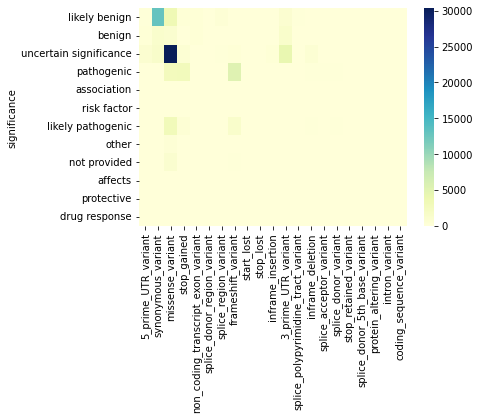

In [13]:
# Heatmap with all the categories and absolute values
sns.heatmap(matrix, cmap="YlGnBu")

<AxesSubplot:ylabel='significance'>

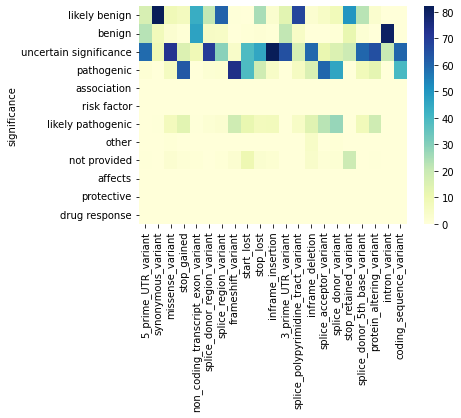

In [14]:
#normalized by consequence

df_norm_row = matrix.apply(lambda x: (x)*100/x.sum(), axis = 0)

sns.heatmap(df_norm_row, cmap="YlGnBu")

In [15]:
#Gettin rid of the variants with uncertain significance and the categories with almost no values
short = matrix.loc[['pathogenic', 'likely pathogenic', 'likely benign', 'benign']]
short

,5_prime_UTR_variant,synonymous_variant,missense_variant,stop_gained,non_coding_transcript_exon_variant,splice_donor_region_variant,splice_region_variant,frameshift_variant,start_lost,stop_lost,...,3_prime_UTR_variant,splice_polypyrimidine_tract_variant,inframe_deletion,splice_acceptor_variant,splice_donor_variant,stop_retained_variant,splice_donor_5th_base_variant,protein_altering_variant,intron_variant,coding_sequence_variant
significance,,,,,,,,,,,,,,,,,,,,,
pathogenic,19,42,2669,2729,1,1,14,5328,51,26,...,20,20,181,215,225,0,5,22,0,4
likely pathogenic,1,59,3004,584,2,1,17,1329,15,10,...,3,17,161,81,135,0,5,32,0,0
likely benign,229,13012,3504,294,250,12,441,29,0,35,...,869,227,29,18,40,13,14,5,0,0
benign,326,1223,1015,36,269,3,35,22,1,2,...,1388,17,0,1,4,3,1,0,4,0


In [16]:
#Ordering the columns in a prettier way 
short_short = short[['protein_altering_variant', 'coding_sequence_variant','missense_variant',
                     'frameshift_variant', 'stop_gained', 
                     'splice_donor_variant', 'splice_acceptor_variant', 'splice_region_variant', 
                     'splice_polypyrimidine_tract_variant', 'splice_donor_5th_base_variant',
                     '3_prime_UTR_variant', '5_prime_UTR_variant', 'stop_lost', 'start_lost', 'stop_retained_variant',
                     'inframe_deletion', 'inframe_insertion', 
                     'non_coding_transcript_exon_variant', 'synonymous_variant']]
short_short

,protein_altering_variant,coding_sequence_variant,missense_variant,frameshift_variant,stop_gained,splice_donor_variant,splice_acceptor_variant,splice_region_variant,splice_polypyrimidine_tract_variant,splice_donor_5th_base_variant,3_prime_UTR_variant,5_prime_UTR_variant,stop_lost,start_lost,stop_retained_variant,inframe_deletion,inframe_insertion,non_coding_transcript_exon_variant,synonymous_variant
significance,,,,,,,,,,,,,,,,,,,
pathogenic,22,4,2669,5328,2729,225,215,14,20,5,20,19,26,51,0,181,15,1,42
likely pathogenic,32,0,3004,1329,584,135,81,17,17,5,3,1,10,15,0,161,25,2,59
likely benign,5,0,3504,29,294,40,18,441,227,14,869,229,35,0,13,29,10,250,13012
benign,0,0,1015,22,36,4,1,35,17,1,1388,326,2,1,3,0,3,269,1223


<AxesSubplot:ylabel='significance'>

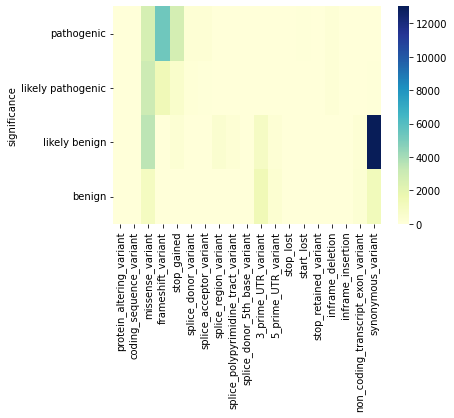

In [17]:
sns.heatmap(short_short, cmap="YlGnBu")

<AxesSubplot:ylabel='significance'>

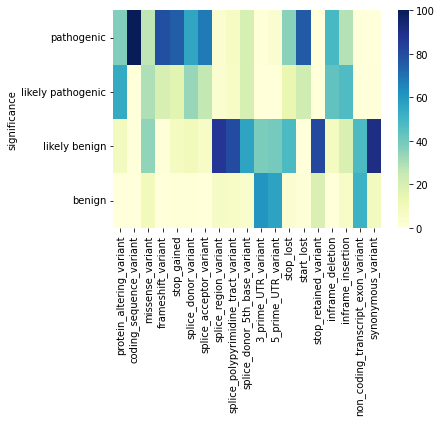

In [19]:
#normalized by consequence

df_norm_row = short_short.apply(lambda x: (x)*100/x.sum(), axis = 0)

sns.heatmap(df_norm_row, cmap="YlGnBu")

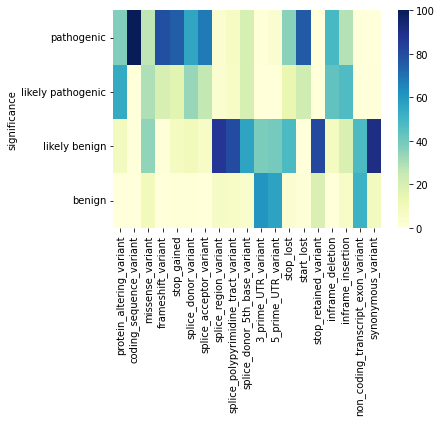

In [20]:
sns.heatmap(df_norm_row, cmap="YlGnBu")

plt.savefig(
    'pathogenicity_Ensembl_heatmat_norm.svg',
    format='svg', bbox_inches="tight")

# Analysis of the distribution of pathogenisity categories in consequence types in the dataset of the variants associated with any phenotype

## 5. Now the same procedure, but for the variants exported from ClinVar

These variants are exported from ClinVar for all phenotypes

In [21]:
ClinVar = pd.read_csv('All_ClinVar.csv')
ClinVar

,Variant ID,Location,Variant type,Gene,Molecular consequences,Most severe clinical significance,Alleles,1000G MAF,GO-ESP MAF,ExAC MAF,Publications (PMIDs)
0,rs41285790,930248,single nucleotide variant,SAMD11 and 1 more,",missense variant",likely-benign,"G,A",A=0.00279553,NaN,A=0.0062182,NaN
1,rs568340123,939399-939485,indel,SAMD11 and 2 more,"splice donor variant,,intron variant",benign,CCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGATCCCCCTCAT...,NaN,NaN,CCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGATC=0.0490231,NaN
2,rs112433394,945564,single nucleotide variant,NOC2L and 1 more,",synonymous variant",benign,"G,A",A=0.00259585,NaN,A=0.00058548,NaN
3,rs113226136,952029,single nucleotide variant,NOC2L and 2 more,",synonymous variant",benign,"G,A,C",C=0.00119808,NaN,NaN,NaN
4,rs58931985,954070,single nucleotide variant,NOC2L and 3 more,",synonymous variant",benign,"C,A,G,T",A=0.00159744,NaN,A=0.000345147,NaN
...,...,...,...,...,...,...,...,...,...,...,...
26305,rs121908151,247425154,single nucleotide variant,NLRP3 and 2 more,",missense variant",pathogenic,"G,A,C",NaN,NaN,NaN,11992256
26306,rs121908152,247425167,single nucleotide variant,NLRP3 and 1 more,",missense variant",pathogenic,"T,C",NaN,NaN,NaN,12032915
26307,rs121908148,247425329,single nucleotide variant,NLRP3 and 1 more,",missense variant",pathogenic,"A,G",NaN,NaN,NaN,"447320,11687797"
26308,rs180177452,247436053,single nucleotide variant,NLRP3 and 2 more,",missense variant,intron variant",pathogenic,"A,C,G",NaN,NaN,NaN,15334500


In [22]:
#Checking what consequence types are there
ClinVar['Molecular consequences'].unique()

array([',missense variant', 'splice donor variant,,intron variant',
       ',synonymous variant', ',missense variant,synonymous variant',
       ',missense variant,nc transcript variant',
       ',missense variant,nc transcript variant,intron variant',
       ',nc transcript variant,synonymous variant',
       ',missense variant,nc transcript variant,synonymous variant',
       ',nc transcript variant,3 prime UTR variant,synonymous variant',
       ',nc transcript variant,synonymous variant,,',
       ',missense variant,nc transcript variant,2KB upstream variant,,',
       'intron variant,2KB upstream variant,,',
       ',nc transcript variant,2KB upstream variant,synonymous variant,,',
       ',missense variant,nc transcript variant,',
       ',missense variant,nc transcript variant,synonymous variant,,',
       ',missense variant,synonymous variant,,', '2KB upstream variant,',
       ',nc transcript variant,synonymous variant,',
       ',frameshift variant,nc transcript variant',
   

In [23]:
new_cons = []
for cons in ClinVar['Molecular consequences']:
    [i for i in cons.split(',') if i]
    new_cons.append([i for i in cons.split(',') if i])
new_cons 

[['missense variant'],
 ['splice donor variant', 'intron variant'],
 ['synonymous variant'],
 ['synonymous variant'],
 ['synonymous variant'],
 ['missense variant'],
 ['synonymous variant'],
 ['missense variant', 'synonymous variant'],
 ['missense variant', 'nc transcript variant'],
 ['missense variant', 'nc transcript variant', 'intron variant'],
 ['nc transcript variant', 'synonymous variant'],
 ['missense variant', 'nc transcript variant', 'synonymous variant'],
 ['nc transcript variant', '3 prime UTR variant', 'synonymous variant'],
 ['nc transcript variant', 'synonymous variant'],
 ['missense variant', 'nc transcript variant', '2KB upstream variant'],
 ['intron variant', '2KB upstream variant'],
 ['nc transcript variant', '2KB upstream variant', 'synonymous variant'],
 ['missense variant', 'nc transcript variant'],
 ['missense variant', 'nc transcript variant'],
 ['missense variant', 'nc transcript variant'],
 ['missense variant', 'nc transcript variant', 'synonymous variant'],
 [

In [24]:
ClinVar = ClinVar.rename(columns={"Molecular consequences": "molecular_consequences", 
                            "Most severe clinical significance": "clinical_significance"})
ClinVar['molecular_consequences'] = new_cons
ClinVar

,Variant ID,Location,Variant type,Gene,molecular_consequences,clinical_significance,Alleles,1000G MAF,GO-ESP MAF,ExAC MAF,Publications (PMIDs)
0,rs41285790,930248,single nucleotide variant,SAMD11 and 1 more,[missense variant],likely-benign,"G,A",A=0.00279553,NaN,A=0.0062182,NaN
1,rs568340123,939399-939485,indel,SAMD11 and 2 more,"[splice donor variant, intron variant]",benign,CCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGATCCCCCTCAT...,NaN,NaN,CCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGATC=0.0490231,NaN
2,rs112433394,945564,single nucleotide variant,NOC2L and 1 more,[synonymous variant],benign,"G,A",A=0.00259585,NaN,A=0.00058548,NaN
3,rs113226136,952029,single nucleotide variant,NOC2L and 2 more,[synonymous variant],benign,"G,A,C",C=0.00119808,NaN,NaN,NaN
4,rs58931985,954070,single nucleotide variant,NOC2L and 3 more,[synonymous variant],benign,"C,A,G,T",A=0.00159744,NaN,A=0.000345147,NaN
...,...,...,...,...,...,...,...,...,...,...,...
26305,rs121908151,247425154,single nucleotide variant,NLRP3 and 2 more,[missense variant],pathogenic,"G,A,C",NaN,NaN,NaN,11992256
26306,rs121908152,247425167,single nucleotide variant,NLRP3 and 1 more,[missense variant],pathogenic,"T,C",NaN,NaN,NaN,12032915
26307,rs121908148,247425329,single nucleotide variant,NLRP3 and 1 more,[missense variant],pathogenic,"A,G",NaN,NaN,NaN,"447320,11687797"
26308,rs180177452,247436053,single nucleotide variant,NLRP3 and 2 more,"[missense variant, intron variant]",pathogenic,"A,C,G",NaN,NaN,NaN,15334500


In [25]:
cons_types = []
for con in ClinVar['molecular_consequences']:
    for el in con:
        if el not in cons_types:
            cons_types.append(el)
cons_types

['missense variant',
 'splice donor variant',
 'intron variant',
 'synonymous variant',
 'nc transcript variant',
 '3 prime UTR variant',
 '2KB upstream variant',
 'frameshift variant',
 'nonsense (stop gained)',
 'splice acceptor variant',
 '5 prime UTR variant',
 '500B downstream variant',
 'stop lost']

In [26]:
clin_sig_types = ClinVar['clinical_significance'].unique()
clin_sig_types

array(['likely-benign', 'benign', 'likely-pathogenic',
       'conflicting-interpretations-of-pathogenicity',
       'benign-likely-benign', 'pathogenic-likely-pathogenic',
       'risk-factor', 'association', 'drug-response', 'protective',
       'pathogenic'], dtype=object)

In [27]:
matrix_colnames = ['consequence']
matrix_colnames.extend(clin_sig_types)
matrix_rows = []

print(matrix_colnames)

sig_dfs = []
for cons_type in cons_types:
    df_one_cons_type = ClinVar[ClinVar.molecular_consequences.apply(
        lambda lst: all(x == cons_type for x in lst))].reset_index(drop=True)
    sig_dfs.append(df_one_cons_type)
    matrix_row = [cons_type] + [ len(df_one_cons_type[df_one_cons_type['clinical_significance'] == clin_sig_type]) for clin_sig_type in clin_sig_types ]
    matrix_rows.append(matrix_row)
   
matrix_df = pd.DataFrame(columns=matrix_colnames, data=matrix_rows)
matrix = matrix_df.set_index('consequence').transpose()
matrix

['consequence', 'likely-benign', 'benign', 'likely-pathogenic', 'conflicting-interpretations-of-pathogenicity', 'benign-likely-benign', 'pathogenic-likely-pathogenic', 'risk-factor', 'association', 'drug-response', 'protective', 'pathogenic']


consequence,missense variant,splice donor variant,intron variant,synonymous variant,nc transcript variant,3 prime UTR variant,2KB upstream variant,frameshift variant,nonsense (stop gained),splice acceptor variant,5 prime UTR variant,500B downstream variant,stop lost
likely-benign,939,3,0,3794,2,334,43,8,5,3,94,4,0
benign,945,2,0,1422,5,473,62,14,4,0,59,8,0
likely-pathogenic,944,193,0,9,10,3,1,395,250,178,0,0,3
conflicting-interpretations-of-pathogenicity,257,3,0,150,1,2,0,4,6,2,5,0,1
benign-likely-benign,53,0,0,40,0,1,0,0,0,0,2,0,0
pathogenic-likely-pathogenic,34,5,0,0,0,0,0,23,13,5,0,0,0
risk-factor,23,0,0,1,0,1,3,0,2,1,1,0,0
association,6,0,0,0,0,1,0,0,1,0,0,0,0
drug-response,6,0,0,0,0,0,1,1,0,0,1,0,0
protective,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='consequence'>

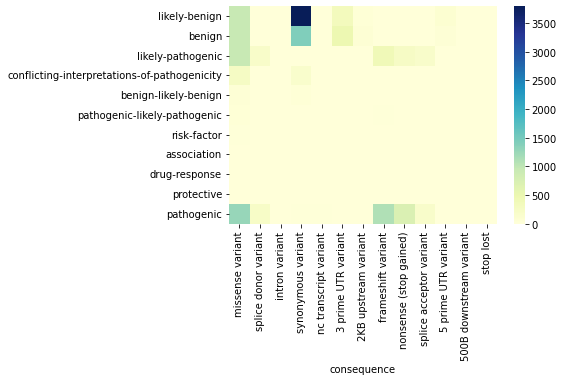

In [28]:
sns.heatmap(matrix, cmap="YlGnBu")

<AxesSubplot:xlabel='consequence'>

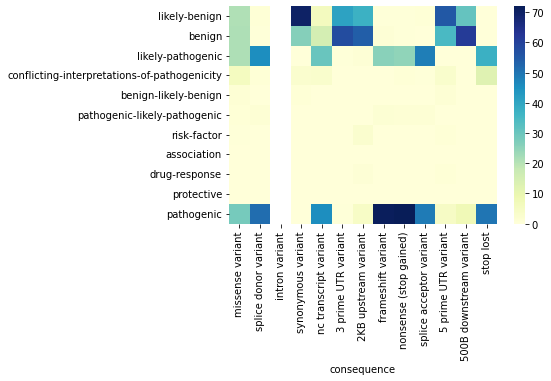

In [29]:
#normalized by consequence

df_norm_row = matrix.apply(lambda x: (x)*100/x.sum(), axis = 0)
sns.heatmap(df_norm_row, cmap="YlGnBu")

In [30]:
short_CV = matrix.loc[['pathogenic', 'likely-pathogenic', 
                'likely-benign', 'benign', 
                'risk-factor', 'conflicting-interpretations-of-pathogenicity']]
short_CV

consequence,missense variant,splice donor variant,intron variant,synonymous variant,nc transcript variant,3 prime UTR variant,2KB upstream variant,frameshift variant,nonsense (stop gained),splice acceptor variant,5 prime UTR variant,500B downstream variant,stop lost
pathogenic,1264,218,0,15,15,4,5,1098,722,181,8,1,4
likely-pathogenic,944,193,0,9,10,3,1,395,250,178,0,0,3
likely-benign,939,3,0,3794,2,334,43,8,5,3,94,4,0
benign,945,2,0,1422,5,473,62,14,4,0,59,8,0
risk-factor,23,0,0,1,0,1,3,0,2,1,1,0,0
conflicting-interpretations-of-pathogenicity,257,3,0,150,1,2,0,4,6,2,5,0,1


In [31]:
short_short_CV = short_CV[['missense variant',
                     'frameshift variant',
                     'splice donor variant',
                     'splice acceptor variant',
                     'nonsense (stop gained)',
                     'stop lost',
                     '3 prime UTR variant',
                     '5 prime UTR variant',
                     'nc transcript variant',
                     '2KB upstream variant',
                     '500B downstream variant',
                     'synonymous variant']]
short_short

,protein_altering_variant,coding_sequence_variant,missense_variant,frameshift_variant,stop_gained,splice_donor_variant,splice_acceptor_variant,splice_region_variant,splice_polypyrimidine_tract_variant,splice_donor_5th_base_variant,3_prime_UTR_variant,5_prime_UTR_variant,stop_lost,start_lost,stop_retained_variant,inframe_deletion,inframe_insertion,non_coding_transcript_exon_variant,synonymous_variant
significance,,,,,,,,,,,,,,,,,,,
pathogenic,22,4,2669,5328,2729,225,215,14,20,5,20,19,26,51,0,181,15,1,42
likely pathogenic,32,0,3004,1329,584,135,81,17,17,5,3,1,10,15,0,161,25,2,59
likely benign,5,0,3504,29,294,40,18,441,227,14,869,229,35,0,13,29,10,250,13012
benign,0,0,1015,22,36,4,1,35,17,1,1388,326,2,1,3,0,3,269,1223


<AxesSubplot:xlabel='consequence'>

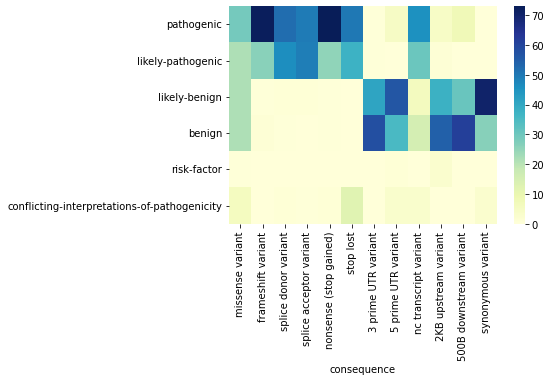

In [33]:
#normalized by consequence

df_norm_row = short_short_CV.apply(lambda x: (x)*100/x.sum(), axis = 0)
sns.heatmap(df_norm_row, cmap="YlGnBu")

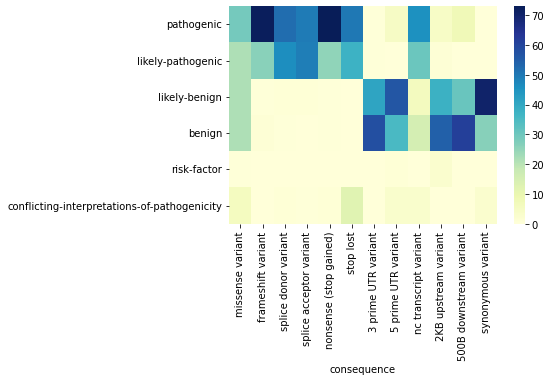

In [34]:
sns.heatmap(df_norm_row, cmap="YlGnBu")

plt.savefig(
    'pathogenicity_ClinVar_heatmat_normalized.svg', 
    format='svg', bbox_inches="tight")